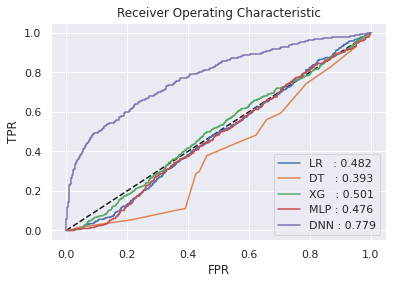

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score

res = pd.read_excel("model_performances.xlsx", engine="openpyxl")

fpr1 , tpr1, thresholds1 = roc_curve(res['label'], res['Score_lr'])
auc1 = roc_auc_score(res['label'], res['Score_lr']).round(3)

fpr2 , tpr2, thresholds2 = roc_curve(res['label'], res['Score_dt'])
auc2 = roc_auc_score(res['label'], res['Score_dt']).round(3)

fpr3 , tpr3, thresholds3 = roc_curve(res['label'], res['Score_xgboost'])
auc3 = roc_auc_score(res['label'], res['Score_xgboost']).round(3)

fpr4 , tpr4, thresholds4 = roc_curve(res['label'], res['Score_mlp'])
auc4 = roc_auc_score(res['label'], res['Score_mlp']).round(3)

fpr5 , tpr5, thresholds5 = roc_curve(res['label'], res['Score_dnn'])
auc5 = roc_auc_score(res['label'], res['Score_dnn']).round(3)

sns.set_theme()
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= f"LR   : {auc1}")
plt.plot(fpr2, tpr2, label= f"DT   : {auc2}")
plt.plot(fpr3, tpr3, label= f"XG   : {auc3}")
plt.plot(fpr4, tpr4, label= f"MLP : {auc4}")
plt.plot(fpr5, tpr5, label= f"DNN : {auc5}")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

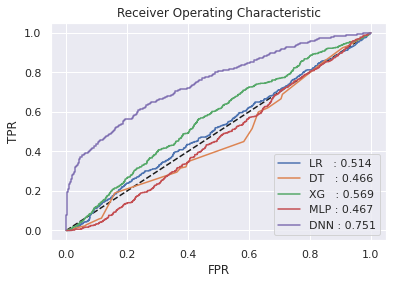

In [3]:
res = pd.read_excel("model_performances_use-target_sub.xlsx", engine="openpyxl")

fpr1 , tpr1, thresholds1 = roc_curve(res['label'], res['Score_lr'])
auc1 = roc_auc_score(res['label'], res['Score_lr']).round(3)

fpr2 , tpr2, thresholds2 = roc_curve(res['label'], res['Score_dt'])
auc2 = roc_auc_score(res['label'], res['Score_dt']).round(3)

fpr3 , tpr3, thresholds3 = roc_curve(res['label'], res['Score_xgboost'])
auc3 = roc_auc_score(res['label'], res['Score_xgboost']).round(3)

fpr4 , tpr4, thresholds4 = roc_curve(res['label'], res['Score_mlp'])
auc4 = roc_auc_score(res['label'], res['Score_mlp']).round(3)

fpr5 , tpr5, thresholds5 = roc_curve(res['label'], res['Score_dnn'])
auc5 = roc_auc_score(res['label'], res['Score_dnn']).round(3)

sns.set_theme()
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= f"LR   : {auc1}")
plt.plot(fpr2, tpr2, label= f"DT   : {auc2}")
plt.plot(fpr3, tpr3, label= f"XG   : {auc3}")
plt.plot(fpr4, tpr4, label= f"MLP : {auc4}")
plt.plot(fpr5, tpr5, label= f"DNN : {auc5}")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()